## Using hund's rule to determine atomic quantum numbers and infer the paramagnetic moment of 4f ions


The paramagnetic moment is given according to the Wigner-Eckart's theorem (Méchanique quantique tome II CLAUDE COHEN-TANNOUDJI) by:

$\hat{µ}$ = -$µ_{B}$(1 + $\frac{J(J + 1) - L(L + 1) + S(S + 1)}{2J(J + 1)}$)$\frac{\hat{J}}{\hbar}$

where:
*  (1 + $\frac{J(J + 1) - L(L + 1) + S(S + 1)}{2J(J + 1)}$) = $g_{J}$ is the Landé factor
* $µ_{B}$ is the Bohr magneton.

* $\hat{J}$ is the total magnetic moment.

* $S$ is the total spin quantum number of the atom.

* $L$ is the total orbital angular momentum quantum number of the atom.

* $J$ is the total angular momentum quantum number of the atom.
 
In the presence of a uniform magnetic field $\overrightarrow{B}$ in the z direction, the average value of $\hat{\mu}$ is:

<$\mu_{z}$> = $\frac{g_{T}^2J(J + 1)}{3k_{B}T}$$\mu_{B}^2$B. This is the (quantum) formalism of Brouillon for paramagnetism.

We define $m_{eff}$ as $m_{eff} = g_{J}\sqrt{J(J + 1)}$ in units of $\mu_{B}$.

Hund's rules are rules that determine the values of J, L, and S for the atom's ground state. These rules, numbering 3, state ([Wikipedia](https://en.wikipedia.org/wiki/Hund%27s_rules)
):

- Regle 1:For a given electron configuration, the term with maximum multiplicity has the lowest energy. The multiplicity is equal to $2S+1$, where $S$ is the total spin angular momentum for all electrons. The multiplicity is also equal to the number of unpaired electrons plus one.Therefore, the term with lowest energy is also the term with maximum $S$, and maximum number of unpaired electrons.
- regle 2:For a given multiplicity, the term with the largest value of the total orbital angular momentum quantum number $L$,  has the lowest energy.
- Regle 3:For a given term, in an atom with outermost subshell half-filled or less, the level with the lowest value of the total angular momentum quantum number $J$,(for the operator ${\boldsymbol  {J}}={\boldsymbol  {L}}+{\boldsymbol  {S}}$) lies lowest in energy. If the outermost shell is more than half-filled, the level with the highest value of $J$ , is lowest in energy

In the following, we propose a program that implements the Hund's rules to determine J, L, and S, and then deduce $m_{eff}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
# n is the number of electrons in the 4f subshell (n varies from 0 to 14)
# For the f subshell, l = 3, so ml = [-3, 3], resulting in 7 quantum states.



def total_spin(n):
    number_of_spin_up = 0;
    number_of_spin_down = 0;
    
    UP = [];
    DOWN = []#np.array(0);
    spin_tot = []#np.array(0);
    A = [];
    
    # Calculation of S
    # 'u' represents the number of spin-up electrons, and 'd' represents the number of spin-down electrons.
    # For the f subshell, there can be a maximum of 7 spin-up electrons and 7 spin-down electrons.
    # Among all the (u, d) pairs, only those where u + d = n are possible.
    # I calculate the total spin for the (u, d) pairs that satisfy the condition u + d = n.
    # Then, among the calculated total spins, I look for the maximum value.

    for u in range(8):
        for d in range(8):
            if u + d == n: # The number of spin-up electrons plus the number of spin-down electrons is equal to the total number of electrons.

                UP.append(u);
                DOWN.append(d);
                spin_tot.append((u-d)/2);
    
    A = [UP , DOWN , spin_tot];
    S = max(spin_tot);
    
    return S




In [3]:
def tolal_orbital_momentum(n):
    #Calculation of L
    # Determine the number of spin UP and the number of spin DOWN
    # We have u + d = n and (u-d)/2 = S
    # By solving the system, we can find the solution:
    number_of_spin_up = (n/2) + total_spin(n) ;
    number_of_spin_down = (n/2) - total_spin(n);
    
    # For a given number of spin-ups, let's determine the possible tuples of values for the spin-up state.
    # Also, determine the possible tuples of values for the spin-down state.

    l = list(range(-3,4));
    
    total_m_for_spin_up = 0;
    total_m_for_spin_down = 0;
    
    if number_of_spin_up != 0:
        for i in range(int(number_of_spin_up )):
            total_m_for_spin_up = total_m_for_spin_up + l[i]
    else: total_m_for_spin_up = 0
                       
    if number_of_spin_down != 0:
        for j in range(int(number_of_spin_down)):
            total_m_for_spin_down = total_m_for_spin_down + l[j]
    else: total_m_for_spin_down = 0
    
    L = total_m_for_spin_up + total_m_for_spin_down
    
    return abs(L)

In [4]:
def total_momentum (n):
     #Calcul de J
    L = tolal_orbital_momentum(n)
    S = total_spin(n)
    if n <= 7:
        J = abs(L - S)
    else:
        J = L + S
        
    return J

In [5]:
#Now we doing the representation of values of J ,L , S with an number of electron varied from 0 to 14 (4f subshell)

L_vector = []
S_vector = []
J_vector = []
nbr_elec = list(range(15))

for n in range(15):
    S_vector.append(total_spin(n))
    L_vector.append(tolal_orbital_momentum(n))
    J_vector.append(total_momentum(n))


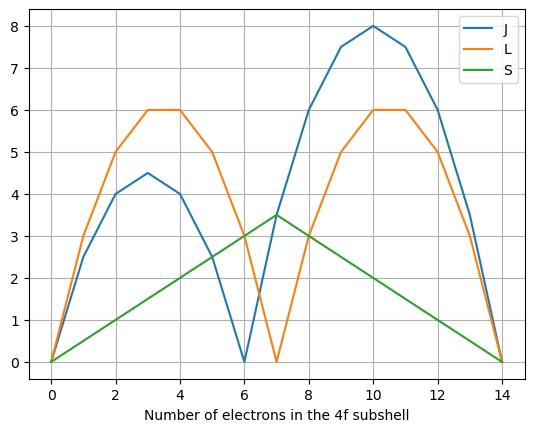

In [6]:
plt.plot(nbr_elec , J_vector ,nbr_elec , L_vector , nbr_elec , S_vector )
plt.xlabel("Number of electrons in the 4f subshell")
plt.legend(['J' , 'L' , 'S'])
plt.grid()
plt.show()

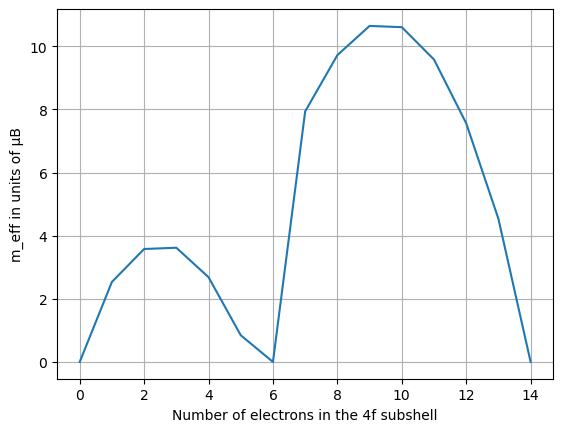

In [18]:
m_eff_vector = []
for i in range(15):
    if J_vector[i] != 0:
        g = (1 + (J_vector[i]*(J_vector[i] + 1) - L_vector[i]*(L_vector[i] + 1) + S_vector[i]*(S_vector[i] + 1))/(2*J_vector[i]*(J_vector[i] + 1)))
        m_eff_vector.append(g*sqrt(J_vector[i]*(J_vector[i] + 1 )))
    
    else:
        m_eff_vector.append(0)
    
plt.plot(nbr_elec , m_eff_vector)
plt.xlabel("Number of electrons in the 4f subshell")
plt.ylabel("m_eff in units of µB")
plt.grid()
plt.show()

The obtained curves correspond to the expectations and allow for the observation of several interesting trends. It can be noted that the results predict that the angular momentum varies as an inverse quadratic function ($-x^{2}$) between 0 and 6 electrons in the 4f subshell. This angular momentum reaches a maximum of 3.577 µB for 2 electrons ($Nd^{3+}$). This variation is also reproduced between 6 and 14 electrons, with a maximum higher than the previous one, reaching 10.645 µB for 9 electrons ($Dy^{3+}$).

It is important to emphasize that these results need to be compared with the available experimental data in order to validate our theoretical approach. The comparison with the experimental results will allow us to determine if our predictions are in agreement with reality.